# Instagram Data Analysis on Top 1,000 Instagram Influencers

### Problem/Ask
What categories are the top Instagram influencers found in? 

### Data Source
Data was obtained from kaggle(https://www.kaggle.com/datasets/prasertk/top-1000-instagram-influencers?resource=download)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('instagram_global_top_1000.csv')
df.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803


In [4]:
df.info

<bound method DataFrame.info of     Country  Rank        Account                           Title  \
0       All     1      cristiano               Cristiano Ronaldo   
1       All     2    kyliejenner                         Kylie 🤍   
2       All     3       leomessi                       Leo Messi   
3       All     4  kendalljenner                         Kendall   
4       All     5    selenagomez                    Selena Gomez   
..      ...   ...            ...                             ...   
995     All   996  senoritasaeva                      Dina Saeva   
996     All   997    manuelneuer                    Manuel Neuer   
997     All   998      sahilkhan  India’s Youth & Fitness IC⭕️N®   
998     All   999    mohanshakti                    Shakti Mohan   
999     All  1000       eduincaz                       Eduin Caz   

                                         Link  \
0        https://www.instagram.com/cristiano/   
1      https://www.instagram.com/kyliejenner/   
2   

In [6]:
# using describe to get the basic statistics of the dataframe
df.describe()

,Rank,Followers,Authentic engagement,Engagement avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,2.483610e+07,6.491228e+05,8.653886e+05
std,288.819436,3.872143e+07,1.098804e+06,1.267515e+06
min,1.000000,2.800000e+06,0.000000e+00,5.200000e+04
25%,250.750000,9.000000e+06,2.091000e+05,3.086000e+05
50%,500.500000,1.440000e+07,3.637000e+05,5.239000e+05
75%,750.250000,2.565000e+07,6.832500e+05,9.508000e+05
max,1000.000000,4.696000e+08,1.340000e+07,1.340000e+07


In [13]:
# returning the relative frequency of audience country elements
# can see that 14% of the top 1,000 influencers have the India as their audience country

df['Audience Country'].value_counts(normalize=True).round(2)

Audience Country
United States           0.28
Brazil                  0.16
India                   0.14
Indonesia               0.13
Mexico                  0.05
Spain                   0.03
Russia                  0.03
Argentina               0.02
Iran                    0.02
United Kingdom          0.02
Turkey                  0.02
Italy                   0.02
South Korea             0.01
Colombia                0.01
Philippines             0.01
France                  0.01
Egypt                   0.01
Germany                 0.01
Nigeria                 0.00
Thailand                0.00
Iraq                    0.00
Morocco                 0.00
Japan                   0.00
Saudi Arabia            0.00
Kazakhstan              0.00
Syria                   0.00
China                   0.00
Algeria                 0.00
United Arab Emirates    0.00
Poland                  0.00
Chile                   0.00
Name: proportion, dtype: float64

In [9]:
# creating a pivot table to show statistics for categories

df.pivot_table(index='Category', values='Followers', aggfunc=['mean','sum','min','max'], sort=False) 

,mean,sum,min,max
,Followers,Followers,Followers,Followers
Category,,,,
Sports with a ball,3.225825e+07,3.322600e+09,5400000.0,400100000.0
Fashion|Modeling|Beauty,3.088000e+08,3.088000e+08,308800000.0,308800000.0
Sports with a ball|Family,1.730500e+08,3.461000e+08,39800000.0,306300000.0
Modeling|Fashion,6.622500e+07,2.649000e+08,11400000.0,217800000.0
Music|Lifestyle,4.848000e+07,4.848000e+08,7600000.0,295800000.0
...,...,...,...,...
Photography|Lifestyle,7.900000e+06,7.900000e+06,7900000.0,7900000.0
Modeling|Music,6.800000e+06,6.800000e+06,6800000.0,6800000.0


In [10]:
df_india = df[df['Audience Country'] == 'India'] 
df_india.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
14,All,15,virat.kohli,Virat Kohli,https://www.instagram.com/virat.kohli/,Sports with a ball,182600000.0,India,2100000.0,2400000.0,2022-02-07 16:50:24.798803
19,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000.0,India,1200000.0,1800000.0,2022-02-07 16:50:24.798803
27,All,28,therock,therock,https://www.instagram.com/therock/,Cinema|Actors/actresses|Fitness|Gym,295800000.0,India,741000.0,994800.0,2022-02-07 16:50:24.798803
28,All,29,instagram,Instagram,https://www.instagram.com/instagram/,Photography,469600000.0,India,490400.0,608100.0,2022-02-07 16:50:24.798803


In [11]:
df_india = df_india.astype({'Followers':'int', 'Authentic engagement':'int','Engagement avg':'int'})
df_india.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,2022-02-07 16:50:24.798803
14,All,15,virat.kohli,Virat Kohli,https://www.instagram.com/virat.kohli/,Sports with a ball,182600000,India,2100000,2400000,2022-02-07 16:50:24.798803
19,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2022-02-07 16:50:24.798803
27,All,28,therock,therock,https://www.instagram.com/therock/,Cinema|Actors/actresses|Fitness|Gym,295800000,India,741000,994800,2022-02-07 16:50:24.798803
28,All,29,instagram,Instagram,https://www.instagram.com/instagram/,Photography,469600000,India,490400,608100,2022-02-07 16:50:24.798803


In [12]:
df_india.pivot_table(index='Category',values='Followers', aggfunc=['mean', 'sum', 'min', 'max'], sort=False)

,mean,sum,min,max
,Followers,Followers,Followers,Followers
Category,,,,
Sports with a ball,7.271000e+07,727100000,5700000,400100000
Music,5.219000e+07,521900000,9100000,219800000
Cinema|Actors/actresses|Fitness|Gym,2.958000e+08,295800000,295800000,295800000
Photography,4.696000e+08,469600000,469600000,469600000
Beauty,6.160000e+07,61600000,61600000,61600000
Cinema|Actors/actresses,2.592143e+07,1451599999,5700000,74000000
Finance|Economics|Business|Careers,6.530000e+07,65300000,65300000,65300000
Lifestyle|Fashion|Clothing|Outfits,3.340000e+07,33400000,33400000,33400000


In [14]:
# showing the categories of the most followers

topfollowers = df_india.nlargest(10,'Followers')

topfollowers.pivot_table(index='Category', values='Followers', aggfunc=['sum'], sort=False)

,sum
,Followers
Category,
Photography,469600000
Sports with a ball,582700000
Cinema|Actors/actresses|Fitness|Gym,295800000
Music,291400000
Cinema|Actors/actresses,142900000
Science|Photography,73900000
Family|Sports with a ball,71100000


In [15]:
# creating dataframe for top 20 followers

top20followers = df_india.nlargest(20,'Followers')

In [17]:
# showing categories with the most avg audience engagement

top_eng_avg = df_india.nlargest(20, 'Engagement avg')
top_eng_avg.pivot_table(index='Category', values='Engagement avg', sort=False)

,Engagement avg
Category,
Sports with a ball,5.950000e+06
Music,3.900000e+06
Beauty,3.800000e+06
Music|Cinema|Actors/actresses,3.600000e+06
Lifestyle|Fashion|Clothing|Outfits,3.200000e+06
Beauty|Art|Artists|Cinema|Actors/actresses,2.700000e+06
Cinema|Actors/actresses,1.842857e+06
Finance|Economics|Business|Careers,2.000000e+06
Fitness|Gym|Lifestyle,2.000000e+06


In [19]:
# showing the categories with the most authentic audience engagement

top_eng = df_india.nlargest(20,'Authentic engagement')

top_eng.pivot_table(index="Category", values="Authentic engagement", sort=False)

,Authentic engagement
Category,
Sports with a ball,4950000.0
Music,2500000.0
Beauty,3300000.0
Music|Cinema|Actors/actresses,2900000.0
Beauty|Art|Artists|Cinema|Actors/actresses,2300000.0
Cinema|Actors/actresses,1475000.0
Lifestyle|Fashion|Clothing|Outfits,2200000.0
Finance|Economics|Business|Careers,1800000.0
Fitness|Gym|Lifestyle,1300000.0


In [21]:
# creating a new fashion category dataframe to include all of the subsets

fashion = df_india[df_india['Category'].str.contains('Fashion', na=False)]
fashion.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
50,All,51,georginagio,Georgina Rodríguez,https://www.instagram.com/georginagio/,Lifestyle|Fashion|Clothing|Outfits,33400000,India,2200000,3200000,2022-02-07 16:50:24.798803
456,All,457,keerthysureshofficial,Keerthy Suresh,https://www.instagram.com/keerthysureshofficial/,Fashion|Cinema|Actors/actresses,11600000,India,516700,591200,2022-02-07 16:50:24.798803
754,All,755,nita_shilimkar,Nita Shilimkar,https://www.instagram.com/nita_shilimkar/,Fashion|Modeling,9500000,India,280100,370700,2022-02-07 16:50:24.798803
782,All,783,sonamkapoor,Sonam Kapoor Ahuja,https://www.instagram.com/sonamkapoor/,Fashion|Modeling,31700000,India,85900,102800,2022-02-07 16:50:24.798803


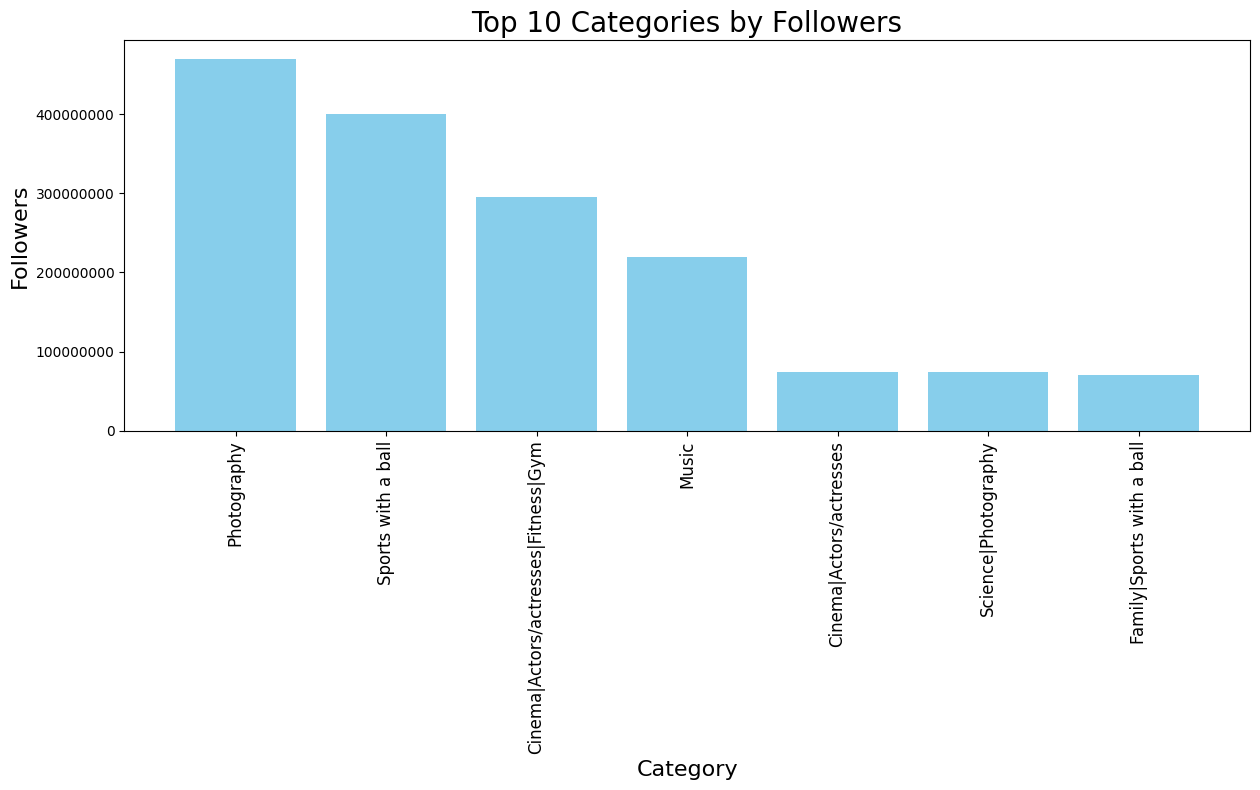

In [22]:
# plotting followers

plt.figure(figsize=(12,8))
fig1 = plt.bar(topfollowers.Category, topfollowers.Followers, label='Followers', width=0.8, color='skyblue')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel("Followers", fontsize = 16)
plt.xlabel("Category", fontsize = 16)
plt.title("Top 10 Categories by Followers", fontsize = 20)
plt.tight_layout()
# remove scientific notation
plt.ticklabel_format(axis="y", style='plain')

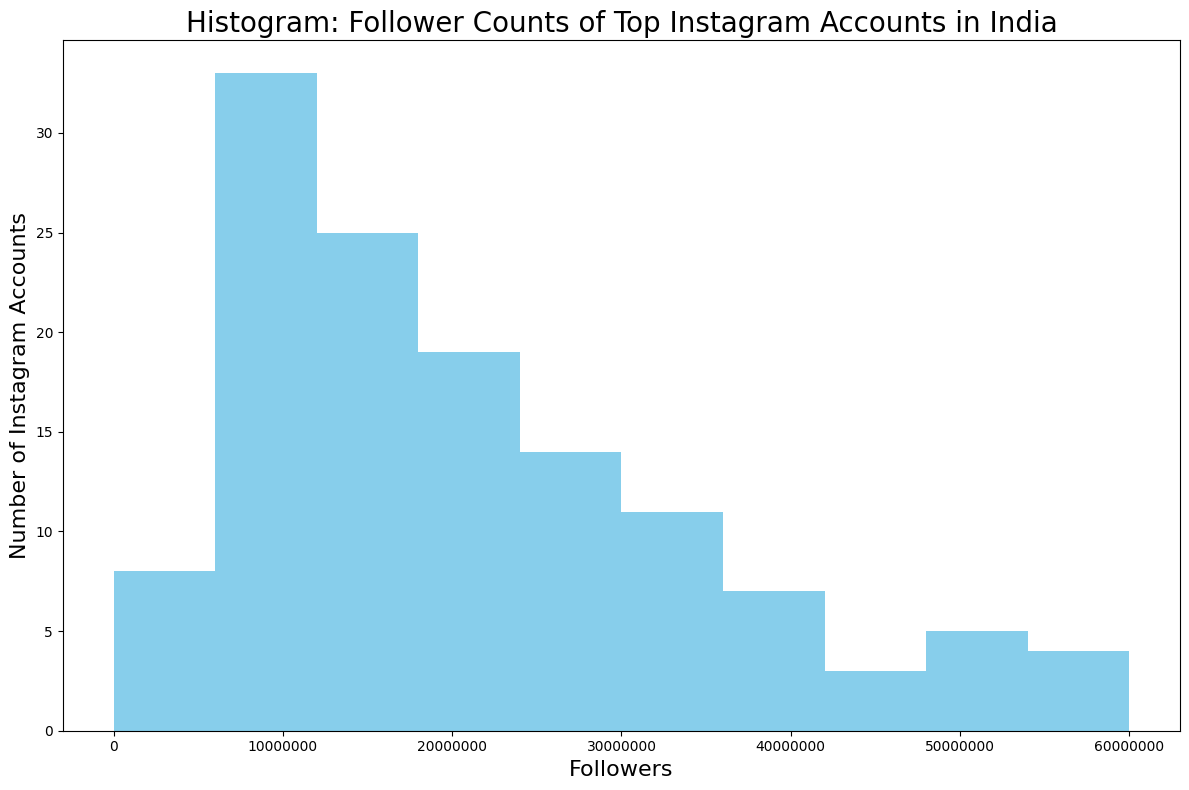

In [26]:
# plotting the number of accounts between 0 and 60 million followers

plt.figure(figsize=(12,8))
plt.hist(df_india.Followers, color='skyblue', range=(0,60000000))
plt.xlabel('Followers', fontsize = 16)
plt.ylabel('Number of Instagram Accounts', fontsize = 16)
plt.title('Histogram: Follower Counts of Top Instagram Accounts in India', fontsize = 20)
plt.tight_layout()
# remove scientific notation
plt.ticklabel_format(style='plain')